In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  

In [2]:
df = pd.read_csv('/Users/siddhant/CustomerSatisfaction/project1/data/raw/Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.shape

(6362620, 11)

In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
round(df.describe(), 2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


In [9]:
'''UNIVARIATE ANALYSIS'''

'UNIVARIATE ANALYSIS'

<Axes: ylabel='amount'>

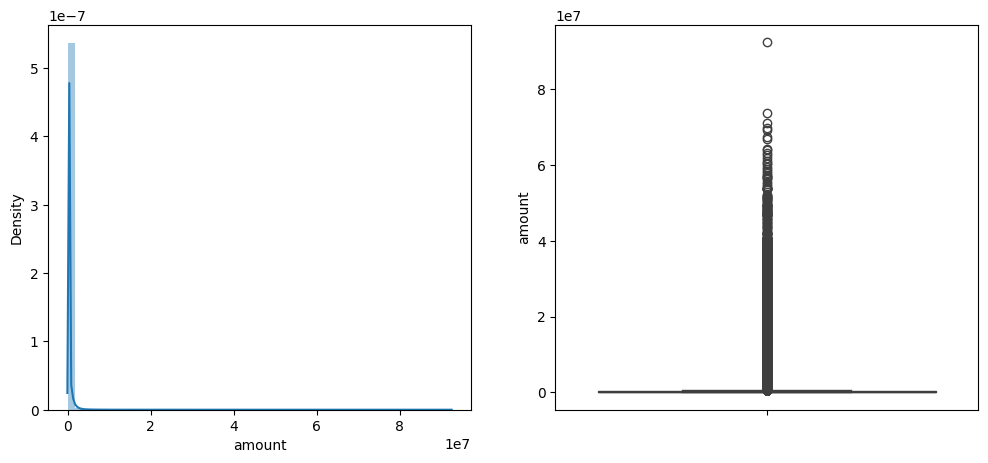

In [10]:
# LETS CHECK TH DISTRIBUTION OF AMOUNT
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(df['amount'], kde=True, ax=ax[0])
sns.boxplot(df['amount'], ax=ax[1])

In [11]:
df[df['isFlaggedFraud'] == 1].head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1


### Fraudulent Scenario 1
When an amount is transacted, there should be a change in the balance of current account from where the amount has been transacted. 
In the above case a certain amount is transacted however, there is no change in the current balance and nor has the transacted amount been reflected in the recipient's balance. This seems fraudulent.

In [12]:
df[(df['isFlaggedFraud'] == 0)].head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [13]:
fraudulent_df = df[df['isFraud'] == 1]
fraudulent_df['type'].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

In [14]:
fraudulent_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0


In [15]:
(df[(df['type'] == 'TRANSFER') | (df['type'] == 'CASH_OUT')].shape[0] / df.shape[0]) * 100

43.54195284332555

In [16]:
(df[((df['type'] == 'TRANSFER') | (df['type'] == 'CASH_OUT')) & (df['isFraud'] == 1)].shape[0] / (df[(df['type'] == 'TRANSFER') | (df['type'] == 'CASH_OUT')].shape[0])) * 100

0.2964544224336551

## Observations:
1. About 43% of transactions happen through Transfer or cashouts

2. Out of this 43%, 0.29% are fraud transactions.

3. All fraudsters employ transfer and cash-out methods for conducting transactions. They focus on targeting customer bank accounts, either by transferring funds to other accounts and depleting the original accounts or by directly cashing out the funds from these accounts.

In [17]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

The target column is highly imbalanced.

### Fraudulent Scenario 2
1. The transactions where the transacted amount is more or equal to the current balance and there is no change in the receivers's balance is a red flag. 
2. Also, cases where the transaction amount is same as the current balance in the account above a certain threshold, might also classify as a fraudulent transaction as it can be an attempt of emptying a particular bank account.

<Axes: >

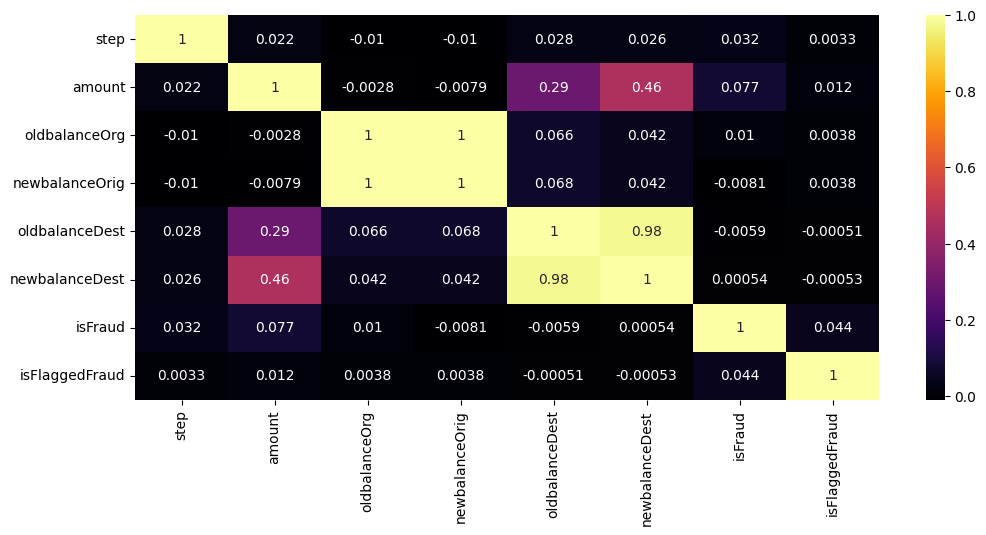

In [18]:
# LETS CHECK THE CORRELATION OF NUMERIC FEATURES WITH TARGET FEATURE
numerical = df.select_dtypes(exclude='object').columns
correlation = df[numerical].corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, cmap='inferno', annot=True)

In [19]:
'''The features oldbalanceOrg and newbalanceOrg have highest correlation with each other of 1. 
Similarly features oldbalanceDest and newbalanceDest are also highly collinear with each other with a collinearity of 0.98.
We need to address this else it will impact the model badly.'''

'The features oldbalanceOrg and newbalanceOrg have highest correlation with each other of 1. \nSimilarly features oldbalanceDest and newbalanceDest are also highly collinear with each other with a collinearity of 0.98.\nWe need to address this else it will impact the model badly.'

In [20]:
df['org_balance_change'] = df.apply(lambda x: 1 if (x['newbalanceOrig'] - x['oldbalanceOrg']) > 0 else 0, axis=1)
df['dest_balance'] = df.apply(lambda x: abs(x['newbalanceDest'] - x['oldbalanceDest']), axis=1)
df['dest_balance_change'] = df.apply(lambda x: 1 if (x['newbalanceDest'] - x['oldbalanceDest']) > 0 else 0, axis=1)

In [21]:
df.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis=1,inplace=True)
df.sample(10)

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,org_balance_change,dest_balance,dest_balance_change
5084280,355,PAYMENT,27295.82,C1049658912,M544415745,0,0,0,0.00,0
3678650,276,CASH_IN,63876.94,C767164721,C1714894608,0,0,1,63876.95,0
5638609,396,PAYMENT,3579.29,C391436078,M1902250007,0,0,0,0.00,0
3468901,258,TRANSFER,19098.80,C1868002809,C1127998663,0,0,0,19098.80,1
5263020,372,PAYMENT,7709.09,C1761459878,M1088600675,0,0,0,0.00,0
1267837,135,TRANSFER,1639914.40,C1698846019,C187727696,0,0,0,1639914.40,1
2689320,211,PAYMENT,3883.94,C1096789612,M181843901,0,0,0,0.00,0
5436537,378,PAYMENT,9441.53,C834363368,M1869833480,0,0,0,0.00,0
106822,10,CASH_IN,66802.92,C1958659520,C381350369,0,0,1,140143.28,1
5487770,380,PAYMENT,10705.52,C1752099560,M1081244848,0,0,0,0.00,0


In [22]:
# LETS ADDRESS THE IMBALANCED TARGET COLUMN. WE WILL CREATE SYNTHETIC DATA POINTS FOR THE MINORITY CLASS USING SMOTEN
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split

X = df.drop(columns='isFraud')
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(f'The size of X_train is {X_train.shape}')
print(f'The size of y_train is {y_train.shape}')
print(f'The size of X_test is {X_test.shape}')
print(f'The size of y_test is {y_test.shape}')

The size of X_train is (5090096, 9)
The size of y_train is (5090096,)
The size of X_test is (1272524, 9)
The size of y_test is (1272524,)


In [24]:
'''Resampling on training set'''
smoten = SMOTEN(sampling_strategy='auto', random_state=42)

X_train_resampled, y_train_resampled = smoten.fit_resample(X_train, y_train)

In [25]:
'''Resampling on testing set'''
X_test_resampled, y_test_resampled = smoten.fit_resample(X_test, y_test)

In [26]:
y_train_resampled.value_counts()

isFraud
0    5083503
1    5083503
Name: count, dtype: int64

In [27]:
X_train_resampled.drop(columns=['nameOrig', 'nameDest'], inplace=True, axis=1)
X_test_resampled.drop(columns=['nameOrig', 'nameDest'], inplace=True, axis=1)

In [28]:
X_train_resampled['type'].value_counts()

type
CASH_OUT    4332670
TRANSFER    2961264
PAYMENT     1720696
CASH_IN     1119184
DEBIT         33192
Name: count, dtype: int64

In [29]:
training_copy = X_train_resampled.copy()
training_copy2 = X_train_resampled.copy()
testing_copy = X_test_resampled.copy()
testing_copy2 = X_test_resampled.copy()

In [30]:
training_copy['type'].value_counts()

type
CASH_OUT    4332670
TRANSFER    2961264
PAYMENT     1720696
CASH_IN     1119184
DEBIT         33192
Name: count, dtype: int64

In [31]:
training_copy.columns

Index(['step', 'type', 'amount', 'isFlaggedFraud', 'org_balance_change',
       'dest_balance', 'dest_balance_change'],
      dtype='object')

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
scaler = StandardScaler()


# EXPERIMENT 1 - ENCODING ORDINALLY
def encode(row):
    if row == 'CASH_OUT':
        return 5
    elif row == 'TRANSFER':
        return 4
    elif row == 'PAYMENT':
        return 3
    elif row == 'CASH_IN':
        return 2
    elif row == 'DEBIT':
        return 1

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier()
xb = XGBClassifier()
svc = SVC()
dtree = DecisionTreeClassifier()
etree = ExtraTreesClassifier()
lr = LogisticRegression()
aboost = AdaBoostClassifier()
gboost = GradientBoostingClassifier()

In [38]:
model_dict = {
    'decision tree': DecisionTreeClassifier(),
    'random forest':RandomForestClassifier(),
    'extra trees': ExtraTreesClassifier(),
    'adaboost': AdaBoostClassifier(),
    'xgboost':XGBClassifier()
}

In [42]:
encode = ['type']
scale = ['step', 'amount', 'dest_balance']

def scorer(model_name, model):
    output = []
    output.append(model_name)
    
    transformer = ColumnTransformer(transformers=[
        ('ohe', ohe, encode),
        ('scale', scaler, scale)
    ], remainder='passthrough')

    pipeline = Pipeline([
        ('transform', transformer),
        (model_name, model)
    ])
    
    pipeline.fit(training_copy, y_train_resampled)
    y_pred = pipeline.predict(testing_copy)
    
    output.append(round(roc_auc_score(y_test_resampled, y_pred), 2))
    
    return output

In [43]:
model_output = []
for model_name, model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [44]:
model_df = pd.DataFrame(model_output, columns=['Model', 'Roc-Auc-Score']).sort_values(by='Roc-Auc-Score', ascending=False)

In [55]:
model_df

,Model,Roc-Auc-Score
3,adaboost,0.92
4,xgboost,0.90
0,decision tree,0.86
2,extra trees,0.84
1,random forest,0.79


### FEATURE SELECTION

In [ ]:
'''GRADIENT BOOSTING CLASSIFIER FEATURE IMPORTANCE'''
transformer = ColumnTransformer(transformers=[
    ('ohe', ohe, encode),
    ('scale', scaler, scale)
], remainder='passthrough')

pipeline_gboost = Pipeline([
    ('transform', transformer),
    ('Gradient Boosting', gboost)
    ])

pipeline_gboost.fit(training_copy, y_train_resampled)
gboost_estimator = pipeline_gboost.named_steps['Gradient Boosting']
features_gboost = gboost_estimator.feature_importances_

In [64]:
# Assuming 'type' is the only categorical column encoded and it's creating additional features.
categorical_features_transformed = [f"type_{i}" for i in range(features_gboost.shape[0] - len(training_copy.columns) + 1)]
numerical_features = [col for col in training_copy.columns if col != 'type']

# Now, concatenate your features assuming the transformation order aligns with how ColumnTransformer processes them.
transformed_feature_names = numerical_features + categorical_features_transformed

# Now create your DataFrame with correctly aligned names
features_importance_gboost = pd.DataFrame(features_gboost, index=transformed_feature_names, columns=['Feature Importance'])


In [65]:
features_importance_gboost

,Feature Importance
step,0.001484
amount,0.261537
isFlaggedFraud,0.000680
org_balance_change,0.020038
dest_balance,0.269616
dest_balance_change,0.102235
type_0,0.058405
type_1,0.232697
type_2,0.000000
type_3,0.008192


In [66]:
'''RANDOM FOREST CLASSIFIER FEATURE IMPORTANCE'''
transformer = ColumnTransformer(transformers=[
    ('ohe', ohe, encode),
    ('scale', scaler, scale)
], remainder='passthrough')

pipeline_RF = Pipeline([
    ('transform', transformer),
    ('Random Forest', rf)
    ])

pipeline_RF.fit(training_copy, y_train_resampled)
rf_estimator = pipeline_RF.named_steps['Random Forest']
features_rf = rf_estimator.feature_importances_

# Assuming 'type' is the only categorical column encoded and it's creating additional features.
categorical_features_transformed_rf = [f"type_{i}" for i in range(features_rf.shape[0] - len(training_copy.columns) + 1)]
numerical_features_rf = [col for col in training_copy.columns if col != 'type']

# Now, concatenate your features assuming the transformation order aligns with how ColumnTransformer processes them.
transformed_feature_names_rf = numerical_features + categorical_features_transformed_rf

# Now create your DataFrame with correctly aligned names
features_importance_rf = pd.DataFrame(features_rf, index=transformed_feature_names_rf, columns=['Feature Importance'])

In [68]:
features_importance_rf

,Feature Importance
step,0.046972
amount,0.054167
isFlaggedFraud,0.002134
org_balance_change,0.113456
dest_balance,0.137633
dest_balance_change,0.157850
type_0,0.147391
type_1,0.221060
type_2,0.000069
type_3,0.041556


Lets go ahead with the same set of features but lets focus on hyper parameter tuning for XGBClassifier and Adaboost

In [76]:
transformer = ColumnTransformer(transformers=[
    ('ohe', ohe, encode),
    ('scale', scaler, scale)
], remainder='passthrough')


xgb_pipeline = Pipeline([
    ('transform', transformer),
    ('XGBoost', XGBClassifier())
])


ada_pipeline = Pipeline([
    ('transform', transformer),
    ('AdaBoost', AdaBoostClassifier())
]) 

In [77]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score


# Randomly sample 60,000 records from the dataset
X_sample = training_copy.sample(n=60000, random_state=42)
y_sample = y_train_resampled.loc[X_sample.index]


# Define the search space for XGBClassifier
xgb_space = {
    'learning_rate': hp.uniform('xgb_learning_rate', 0.01, 0.2),
    'max_depth': hp.choice('xgb_max_depth', range(3, 10)),
    'subsample': hp.uniform('xgb_subsample', 0.7, 1.0),
    'colsample_bytree': hp.uniform('xgb_colsample_bytree', 0.7, 1.0),
    'n_estimators': hp.choice('xgb_n_estimators', range(100, 1000, 100)),
    'objective': 'binary:logistic'
}


# Objective function for XGB
def objective_xgb(space):
    xgb_pipeline.set_params(XGBoost__learning_rate=space['learning_rate'],
                            XGBoost__max_depth=space['max_depth'],
                            XGBoost__subsample=space['subsample'],
                            XGBoost__colsample_bytree=space['colsample_bytree'],
                            XGBoost__n_estimators=space['n_estimators'],
                            XGBoost__objective=space['objective'])
    
    score = cross_val_score(xgb_pipeline, X_sample, y_sample, scoring='roc_auc', cv=3).mean()
    return {'loss': -score, 'status': STATUS_OK}



# Running the optimization for XGBoost
trials_xgb = Trials()
best_xgb = fmin(fn=objective_xgb,
                space=xgb_space,
                algo=tpe.suggest,
                max_evals=50,  # Adjust as needed
                trials=trials_xgb)




100%|██████████| 50/50 [02:35<00:00,  3.12s/trial, best loss: -0.9991848071733435]


In [79]:
best_params = {
    'learning_rate': best_xgb['xgb_learning_rate'],
    'max_depth': range(3, 10)[best_xgb['xgb_max_depth']],
    'subsample': best_xgb['xgb_subsample'],
    'colsample_bytree': best_xgb['xgb_colsample_bytree'],
    'n_estimators': range(100, 1000, 100)[best_xgb['xgb_n_estimators']],
    'objective': 'binary:logistic'
}

print("Best parameters for XGBoost:")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Max Depth: {best_params['max_depth']}")
print(f"Subsample: {best_params['subsample']}")
print(f"Colsample_bytree: {best_params['colsample_bytree']}")
print(f"Number of Estimators: {best_params['n_estimators']}")


Best parameters for XGBoost:
Learning Rate: 0.18753281169411604
Max Depth: 9
Subsample: 0.7463136914901966
Colsample_bytree: 0.9715887740003736
Number of Estimators: 900


In [78]:
# Define the search space for AdaBoostClassifier
ada_space = {
    'learning_rate': hp.uniform('ada_learning_rate', 0.01, 1.0),
    'n_estimators': hp.choice('ada_n_estimators', range(50, 1000, 50))
}

# Objective function for Ada
def objective_ada(space):
    ada_pipeline.set_params(AdaBoost__learning_rate=space['learning_rate'],
                            AdaBoost__n_estimators=space['n_estimators'])
    
    score = cross_val_score(ada_pipeline, X_sample, y_sample, scoring='roc_auc', cv=3).mean()
    return {'loss': -score, 'status': STATUS_OK}

# Running the optimization for AdaBoost
trials_ada = Trials()
best_ada = fmin(fn=objective_ada,
                space=ada_space,
                algo=tpe.suggest,
                max_evals=50,  # Adjust as needed
                trials=trials_ada)


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [20:14<00:00, 24.29s/trial, best loss: -0.9886883984775086]


In [81]:
best_params_ada = {
    'learning_rate': best_ada['ada_learning_rate'],
    'n_estimators': range(50, 1000, 50) [best_ada['ada_n_estimators']]
}

print("Best parameters for AdaBoost:")
print(f"Learning Rate: {best_params_ada['learning_rate']}")
print(f"Number of Estimators: {best_params_ada['n_estimators']}")

Best parameters for AdaBoost:
Learning Rate: 0.998981951481066
Number of Estimators: 900


FINAL TRAINING 

In [82]:
'''LETS GO AHEAD AND TRAIN OUR MODEL WITH XGBOOST'''
from sklearn.metrics import confusion_matrix

xgb = XGBClassifier(**best_params)

main_pipeline =Pipeline([
    ('transform', transformer),
    ('XGBoost', xgb)
])

main_pipeline.fit(training_copy, y_train_resampled)
prediction = main_pipeline.predict(testing_copy)

### PREDICTION ON ACTUAL TEST SET WHICH IS NOT RESAMPLED

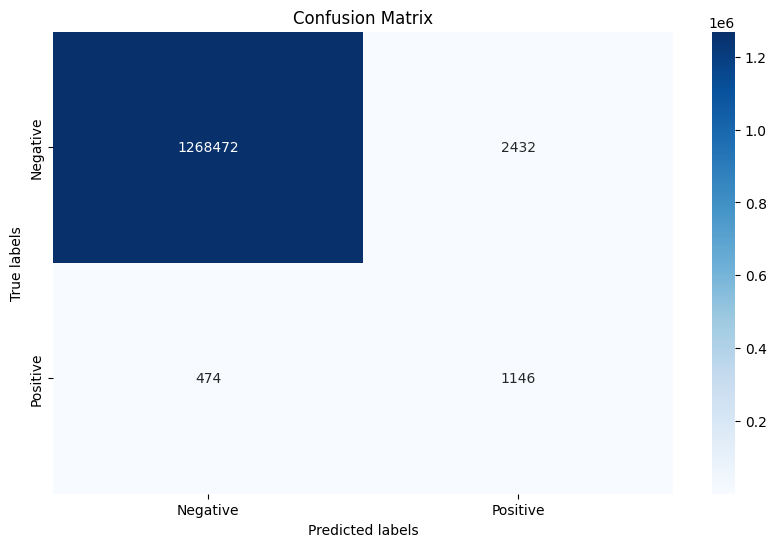

In [92]:
X_test.drop(columns=['nameOrig', 'nameDest'], inplace=True, axis=1)

pred = main_pipeline.predict(X_test)
ctest = confusion_matrix(y_test, pred)


fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(ctest, annot=True, fmt='d', ax=ax, cmap='Blues') 


ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

In [113]:
from sklearn.metrics import recall_score, roc_curve, f1_score, auc 
print(f'The recall is: {round(recall_score(y_test, pred), 2)}')
print(f"The Model has a ROC-AUC score of: {round(roc_auc_score(y_test, pred), 2)}")

The recall is: 0.71
The Model has a ROC-AUC score of: 0.85


### OBSERVATIONS
1. A recall score of 0.71 means that out of all the frauds, our model is classifying 71% correctly. 
2. The model does an excellent job identifying the majority class (non-fraud).
3. The number of False Positives is relatively low, which is good as it means few legitimate transactions are being flagged as fraudulent.

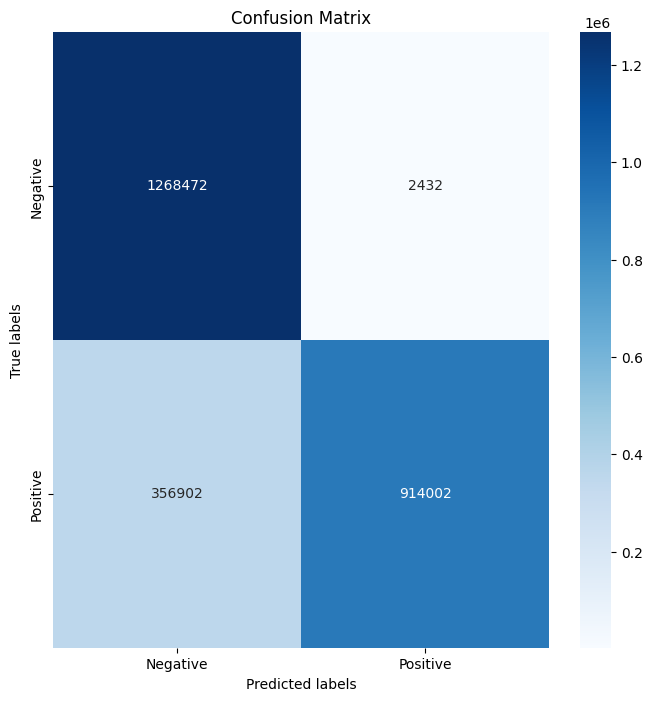

In [83]:
cm = confusion_matrix(y_test_resampled, prediction)


fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues') 


ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

In [117]:
print(f'The recall is: {round(recall_score(y_test_resampled, prediction), 2)}')
print(f"The Model has a ROC-AUC score of: {round(roc_auc_score(y_test_resampled, prediction), 2)}")

The recall is: 0.72
The Model has a ROC-AUC score of: 0.86


Plotting the ROC-AUC curve for both the resampled test set and actual test set.

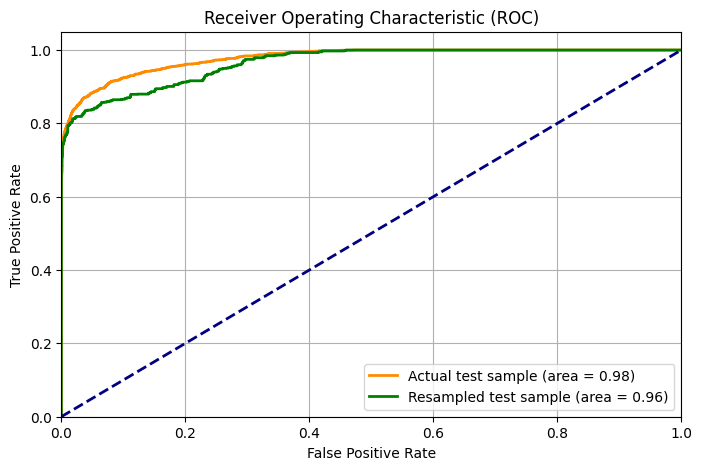

In [118]:
score_actual_test = main_pipeline.predict_proba(X_test)[:,1]
score_resampled_test = main_pipeline.predict_proba(X_test_resampled)[:,1]

fpr_actual, tpr_actual, thresholds_actual = roc_curve(y_test, score_actual_test)
fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test_resampled, score_resampled_test)

roc_auc_actual = auc(fpr_actual, tpr_actual)
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_actual, tpr_actual, color='darkorange', lw=2, label=f'Actual test sample (area = {roc_auc_actual:.2f})')
plt.plot(fpr_resampled, tpr_resampled, color='green', lw=2, label=f'Resampled test sample (area = {roc_auc_resampled:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()